# Basic dataset preparation

## Columns of the full dataset

In [24]:
import pandas as pd
# The whole data set

# Generalized code for accessing the data directory
# (Meant to work even if this file is within some other subdirectory)
path = "data/amazonConsumerReviews.csv"
while True:
    try:
        data = pd.read_csv(path)
        break
    except:
        path = "../" + path
print("COLUMN NAMES\n------------")
for c in data.columns: print(c)

COLUMN NAMES
------------
id
dateAdded
dateUpdated
name
brand
categories
primaryCategories
manufacturer
manufacturerNumber
reviews.date
reviews.doRecommend
reviews.numHelpful
reviews.rating
reviews.text
reviews.title


## Only keeping relevant columns

In [25]:
# Only selecting relevant columns
reviewsData = data[['id',
                  'reviews.doRecommend',
                  'reviews.rating',
                  'reviews.text',
                  'reviews.title']]
reviewsData.head(3)

,id,reviews.doRecommend,reviews.rating,reviews.text,reviews.title
0,AVqVGZNvQMlgsOJE6eUY,False,3,I thought it would be as big as small paper bu...,Too small
1,AVqVGZNvQMlgsOJE6eUY,True,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,AVqVGZNvQMlgsOJE6eUY,True,4,Didnt know how much i'd use a kindle so went f...,Great for the price


# TextBlob analysis

In [26]:
from textblob import TextBlob
# TextBlob has a pre-trained sentiment prediction model

# Example of positive sentiment
text = reviewsData['reviews.text'][8]
print("\nEXAMPLE: POSITIVE SENTIMENT")
print(text + "\n")
blob = TextBlob(text)
print(blob.sentiment)

# Example of negative sentiment
text = reviewsData['reviews.text'][123]
print("\nEXAMPLE: NEGATIVE SENTIMENT")
print(text + "\n")
blob = TextBlob(text)
print(blob.sentiment)


EXAMPLE: POSITIVE SENTIMENT
amazon kindle is always the best ebook, upgrade every new model

Sentiment(polarity=0.5681818181818181, subjectivity=0.37727272727272726)

EXAMPLE: NEGATIVE SENTIMENT
Little putsy so far, but there are continuous updates that I think will make this a great device to stay connected with family. Bought a second for my dad. Who knows, he might replace his land line someday if this gets better. I do think our original Echo is a bit better at responding, but I enjoy this one in the kitchen /aka hub of the house.

Sentiment(polarity=0.3109375, subjectivity=0.5625)


There are 4471 positive and 529 negative reviews


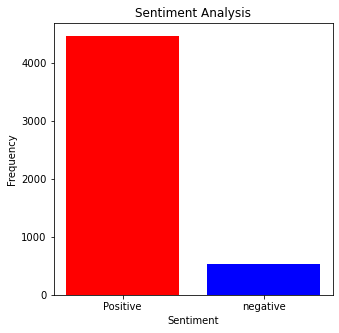

In [43]:
sentiment = []
allSentiments = []
pos_review = []
neg_review = []
from textblob import TextBlob
for i in range(len(reviewsData)):
    blob = TextBlob(reviewsData['reviews.text'][i])
    allSentiments.append(blob.sentiment[0])
    if(blob.sentiment[0]>0):
        pos_review.append(reviewsData['reviews.text'][i])
    else:
        neg_review.append(reviewsData['reviews.text'][i])
n_pos = len(pos_review)
n_neg = len(neg_review)
print("There are",n_pos,"positive and",n_neg,"negative reviews")
# There are 66 positive and 31 negative reviews
import numpy as np
import matplotlib.pyplot as plt
data = {'Positive':n_pos, 'negative':n_neg}
sentiment = data.keys()
counts = data.values()
  
fig = plt.figure(figsize = (5, 5))

plt.bar(sentiment, counts, color =['red', 'blue'])
 
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis")
plt.show()

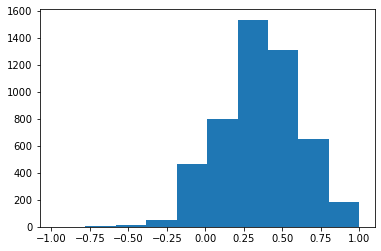

In [46]:
plt.hist(allSentiments)
plt.show()